## NBA Basketball - Offensive and Defensive Game Play

In [48]:
from pymongo import MongoClient
import pprint

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Requests sends and receives HTTP requests.
import requests

import json
import time
import copy

In [ ]:
pd.set_option('display.max_columns', None)

In [2]:
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import boxscorefourfactorsv2

In [3]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [4]:
player_df = pd.DataFrame(players.get_players())
player_df.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [ ]:
#game_log_1819 = leaguegamelog.LeagueGameLog(counter = 0, direction = "DESC",
#                 league_id = "00", player_or_team_abbreviation = "T", season = "2018-19",
#                 season_type_all_star = "Regular Season", sorter = "DATE").get_data_frames()

In [ ]:
#game_log_1819[0].to_csv(r'../data_1/game_log_1819.csv', index=False)

In [9]:
game_log_1819 = pd.read_csv('../data_1/game_log_1819.csv')
game_log_1819.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612763,MEM,Memphis Grizzlies,21801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
1,22018,1610612744,GSW,Golden State Warriors,21801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
2,22018,1610612753,ORL,Orlando Magic,21801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
3,22018,1610612766,CHA,Charlotte Hornets,21801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [ ]:
#leaguedashteamstats = leaguedashteamstats.LeagueDashTeamStats().get_data_frames()

In [ ]:
#leaguedashteamstats[0].to_csv(r'../data_1/leaguedashteamstats.csv', index=False)

In [25]:
leaguedashteamstats = pd.read_csv('../data_1/leaguedashteamstats.csv')
leaguedashteamstats.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,31,13,18,0.419,1498.0,1229,2714,0.453,377,1057,0.357,675,822,0.821,342,1067,1409,755,437.0,215,148,179,617,670,3510,2.0,12,20,22,22,16,20,17,21,20,17,19,2,2,4,5,12,9,15,13,20,18,25,19,3,12,13,10,Atlanta Hawks
1,1610612738,Boston Celtics,31,15,16,0.484,1493.0,1265,2737,0.462,383,1033,0.371,518,681,0.761,341,1024,1365,686,448.0,253,156,154,663,612,3431,28.0,12,13,15,15,17,15,15,17,18,21,13,16,15,21,6,20,16,25,18,8,15,14,26,15,16,12,10,Boston Celtics
2,1610612751,Brooklyn Nets,33,21,12,0.636,1604.0,1444,2883,0.501,499,1229,0.406,611,755,0.809,276,1160,1436,889,479.0,214,183,145,636,628,3998,136.0,1,4,7,6,1,1,4,1,3,5,2,3,4,6,21,3,8,1,26,21,3,11,22,13,1,6,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,30,14,16,0.467,1445.0,1221,2663,0.459,416,1091,0.381,469,609,0.770,323,1005,1328,810,459.0,241,141,161,554,563,3327,-32.0,21,17,15,18,24,22,20,19,8,14,7,25,25,20,12,27,22,5,23,11,20,20,5,24,22,19,10,Charlotte Hornets
4,1610612741,Chicago Bulls,30,14,16,0.467,1450.0,1281,2657,0.482,397,1049,0.378,481,601,0.800,264,1067,1331,784,478.0,211,130,131,615,587,3440,-3.0,21,17,15,18,22,10,21,5,15,19,10,22,26,7,22,12,19,13,25,24,24,5,18,22,15,14,10,Chicago Bulls


In [ ]:
#boxscorefourfactor = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id='0021800997').get_data_frames()

In [ ]:
#boxscorefourfactor[0].to_csv(r'../data_1/boxscorefourfactor.csv', index=False)

In [26]:
boxscorefourfactor = pd.read_csv('../data_1/boxscorefourfactor.csv')
boxscorefourfactor.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,21800997,1610612745,HOU,Houston,201569,Eric Gordon,F,NaN,31:48,0.432,0.220,0.099,0.286,0.459,0.224,0.214,0.261
1,21800997,1610612745,HOU,Houston,200782,P.J. Tucker,F,NaN,37:51,0.471,0.286,0.141,0.293,0.441,0.339,0.206,0.345
2,21800997,1610612745,HOU,Houston,203991,Clint Capela,C,NaN,35:39,0.409,0.242,0.155,0.302,0.464,0.321,0.197,0.280
3,21800997,1610612745,HOU,Houston,201935,James Harden,G,NaN,33:55,0.467,0.328,0.143,0.278,0.510,0.294,0.220,0.320
4,21800997,1610612745,HOU,Houston,101108,Chris Paul,G,NaN,32:50,0.452,0.242,0.148,0.282,0.490,0.353,0.194,0.217


### General Dataset Information

In [12]:
game_log_1819.shape

(2460, 29)

In [7]:
game_log_1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          2460 non-null   int64  
 1   TEAM_ID            2460 non-null   int64  
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_NAME          2460 non-null   object 
 4   GAME_ID            2460 non-null   int64  
 5   GAME_DATE          2460 non-null   object 
 6   MATCHUP            2460 non-null   object 
 7   WL                 2460 non-null   object 
 8   MIN                2460 non-null   int64  
 9   FGM                2460 non-null   int64  
 10  FGA                2460 non-null   int64  
 11  FG_PCT             2460 non-null   float64
 12  FG3M               2460 non-null   int64  
 13  FG3A               2460 non-null   int64  
 14  FG3_PCT            2460 non-null   float64
 15  FTM                2460 non-null   int64  
 16  FTA                2460 

In [30]:
game_log_1819.describe()

,SEASON_ID,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,2460.0,2.460000e+03,2.460000e+03,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,22018.0,1.610613e+09,2.180062e+07,241.646341,41.082114,89.210569,0.461429,11.363821,32.008943,0.355224,17.680488,23.072358,0.767115,10.347154,34.818293,45.165447,24.586585,7.633740,4.953252,14.082927,20.904472,111.208537,0.000000,1.011382
std,0.0,8.657201e+00,3.551425e+02,7.601350,5.219906,7.332872,0.053312,3.730194,7.310012,0.086793,6.087503,7.466480,0.102344,3.758657,5.468226,6.692565,5.119577,2.947763,2.485716,3.927105,4.293642,12.651393,14.659231,0.106100
min,22018.0,1.610613e+09,2.180000e+07,240.000000,25.000000,64.000000,0.278000,2.000000,12.000000,0.115000,2.000000,4.000000,0.263000,1.000000,18.000000,22.000000,10.000000,0.000000,0.000000,3.000000,9.000000,68.000000,-56.000000,1.000000
25%,22018.0,1.610613e+09,2.180031e+07,240.000000,38.000000,85.000000,0.426000,9.000000,27.000000,0.296000,13.000000,18.000000,0.700000,8.000000,31.000000,41.000000,21.000000,6.000000,3.000000,11.000000,18.000000,103.000000,-9.000000,1.000000
50%,22018.0,1.610613e+09,2.180062e+07,240.000000,41.000000,89.000000,0.460000,11.000000,32.000000,0.353000,17.000000,23.000000,0.771000,10.000000,35.000000,45.000000,24.000000,7.000000,5.000000,14.000000,21.000000,111.000000,0.000000,1.000000
75%,22018.0,1.610613e+09,2.180092e+07,240.000000,44.000000,94.000000,0.495000,14.000000,37.000000,0.409250,22.000000,28.000000,0.840000,13.000000,38.000000,50.000000,28.000000,9.000000,6.000000,17.000000,24.000000,120.000000,9.000000,1.000000
max,22018.0,1.610613e+09,2.180123e+07,340.000000,61.000000,123.000000,0.649000,27.000000,70.000000,0.842000,44.000000,54.000000,1.000000,26.000000,55.000000,71.000000,42.000000,20.000000,19.000000,29.000000,38.000000,168.000000,56.000000,2.000000


In [ ]:
game_log_1819.duplicated().sum()

In [ ]:
boxscorefourfactor.info()

In [ ]:
boxscorefourfactor.describe()

In [ ]:
boxscorefourfactor.duplicated().sum()

### Dataset Preparation


### Exploratory Data Analysis

In [10]:
game_log_1819.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612763,MEM,Memphis Grizzlies,21801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
1,22018,1610612744,GSW,Golden State Warriors,21801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
2,22018,1610612753,ORL,Orlando Magic,21801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
3,22018,1610612766,CHA,Charlotte Hornets,21801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [41]:
game_filter_wins = game_log_1819[game_log_1819['WL']=='W'] 
game_filter_losses = game_log_1819[game_log_1819['WL']=='L']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612763,MEM,Memphis Grizzlies,21801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
2,22018,1610612753,ORL,Orlando Magic,21801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
5,22018,1610612743,DEN,Denver Nuggets,21801228,2019-04-10,DEN vs. MIN,W,240,39,87,0.448,10,33,0.303,11,17,0.647,12,41,53,23,6,4,13,12,99,4,1
7,22018,1610612754,IND,Indiana Pacers,21801220,2019-04-10,IND @ ATL,W,240,45,98,0.459,12,30,0.400,33,39,0.846,13,30,43,22,12,7,8,28,135,1,1
8,22018,1610612760,OKC,Oklahoma City Thunder,21801226,2019-04-10,OKC @ MIL,W,240,48,99,0.485,23,54,0.426,8,13,0.615,9,44,53,40,7,3,13,20,127,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,22018,1610612756,PHX,Phoenix Suns,21800013,2018-10-17,PHX vs. DAL,W,240,44,81,0.543,19,34,0.559,14,16,0.875,6,38,44,35,5,2,12,22,121,21,1
2453,22018,1610612752,NYK,New York Knicks,21800007,2018-10-17,NYK vs. ATL,W,240,45,99,0.455,12,33,0.364,24,31,0.774,10,36,46,21,12,6,16,23,126,19,1
2454,22018,1610612759,SAS,San Antonio Spurs,21800010,2018-10-17,SAS vs. MIN,W,240,40,93,0.430,11,25,0.440,21,29,0.724,19,33,52,22,3,4,12,22,112,4,1
2457,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,97,0.433,11,37,0.297,10,14,0.714,12,43,55,21,7,5,15,20,105,18,1


In [44]:
game_groupby_team = game_filter_wins.groupby(
    ['TEAM_ABBREVIATION']).agg({'WL': 'count'})
game_groupby_team

,WL
TEAM_ABBREVIATION,
ATL,29
BKN,42
BOS,49
CHA,39
CHI,22
CLE,19
DAL,33
DEN,54
DET,41


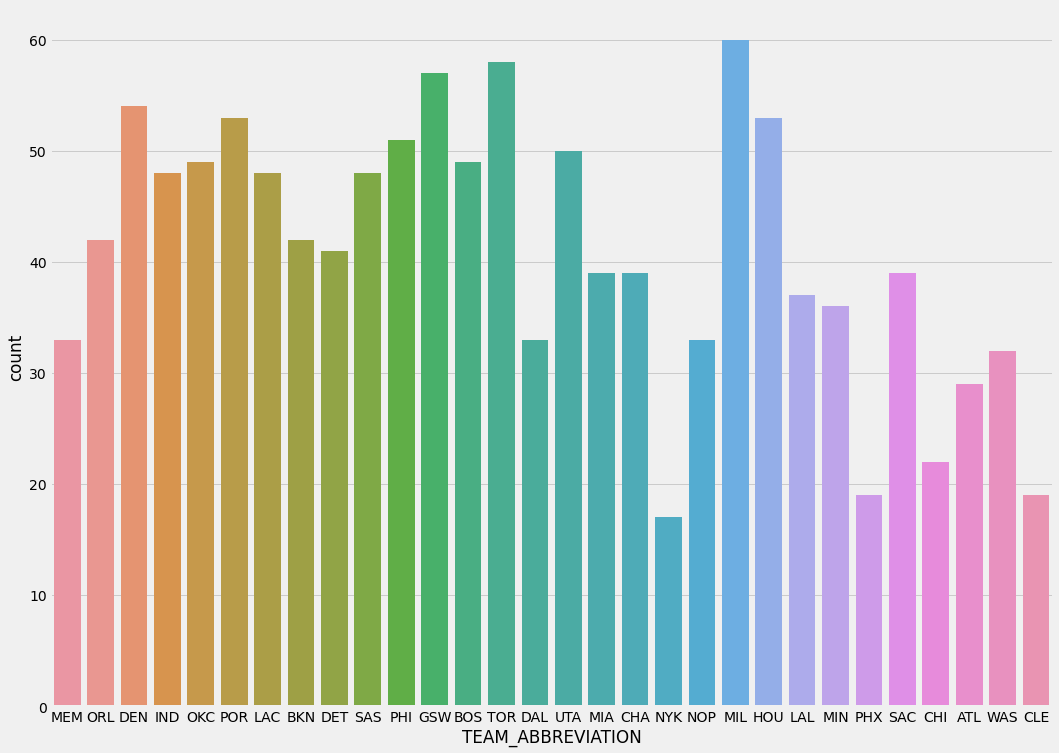

In [70]:
game_win_query = game_log_1819.query('WL == "W"')
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_win_query, ax=ax);

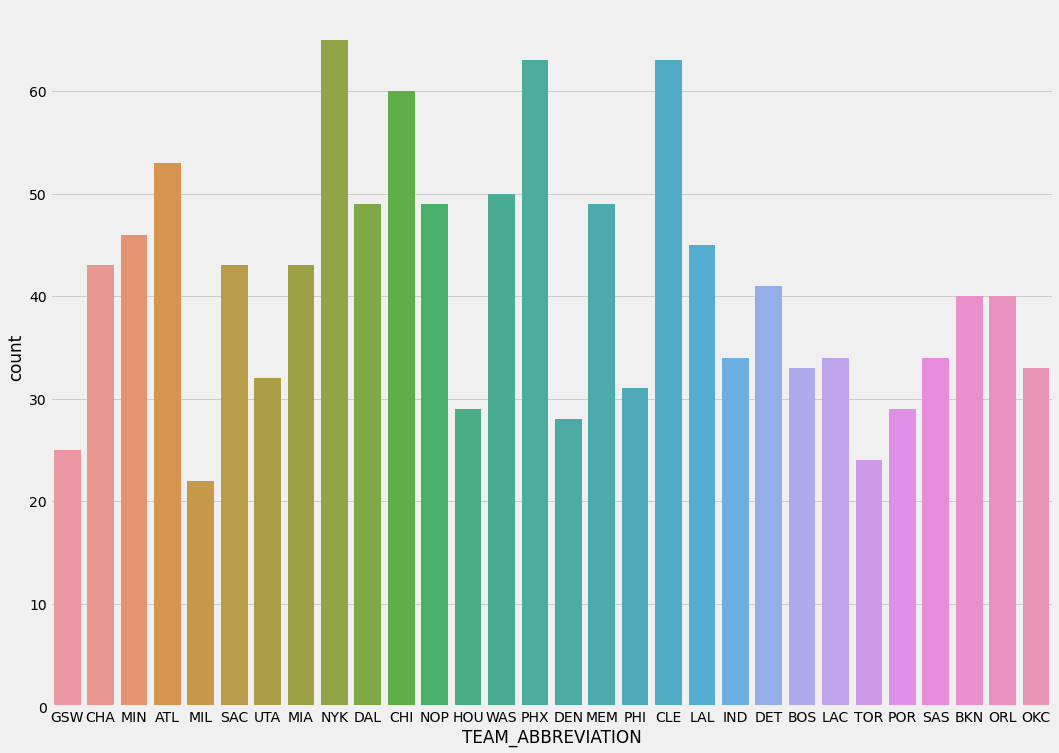

In [71]:
game_loss_query = game_log_1819.query('WL == "L"')
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_loss_query, ax=ax);

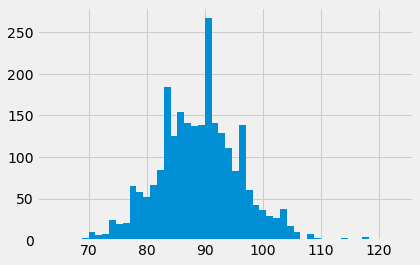

In [27]:
fig, ax = plt.subplots()
ax.hist(game_log_1819['FGA'], bins=50)
plt.show()

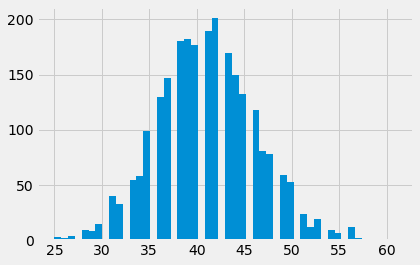

In [28]:
fig, ax = plt.subplots()
ax.hist(game_log_1819['FGM'], bins=50)
plt.show()

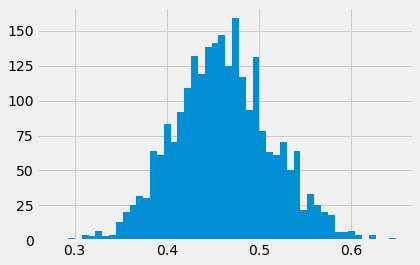

In [29]:
fig, ax = plt.subplots()
ax.hist(game_log_1819['FG_PCT'], bins=50)
plt.show()

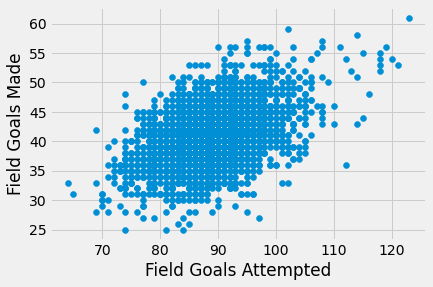

In [22]:
fig, ax = plt.subplots()
ax.scatter(game_log_1819['FGA'], game_log_1819['FGM'])
ax.set_xlabel('Field Goals Attempted')
ax.set_ylabel('Field Goals Made')
plt.show()

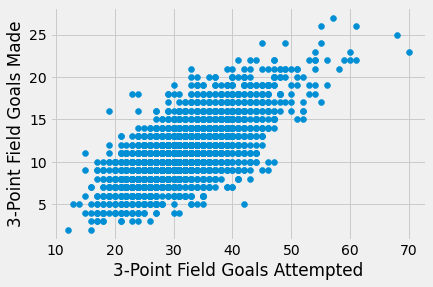

In [23]:
fig, ax = plt.subplots()
ax.scatter(game_log_1819['FG3A'], game_log_1819['FG3M'])
ax.set_xlabel('3-Point Field Goals Attempted')
ax.set_ylabel('3-Point Field Goals Made')
plt.show()

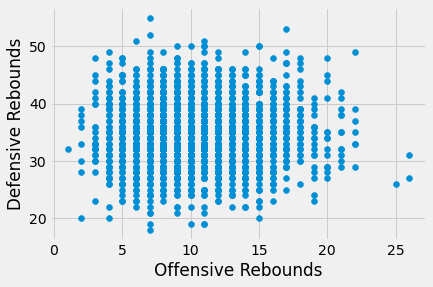

In [24]:
fig, ax = plt.subplots()
ax.scatter(game_log_1819['OREB'], game_log_1819['DREB'])
ax.set_xlabel('Offensive Rebounds')
ax.set_ylabel('Defensive Rebounds')
plt.show()

### Hypothesis Tests

**Scientific question:** Is there a play between offensive and defensive play that is more effective in achieving a game win?

**Null:** There is no difference between the impact of offensive or defensive play in achieving a game win.

**Alternative:** There is a difference between the impact of offensive or defensive play in achieving a game win.

**Test statistic:** 2,460 regular season games from the 20xx - xx NBA season
(=82 games per team * 30 NBA teams)

Dataset: using proxies, such as either offensive (ORtg) and defensive (DRtg) ratings or offense and defense four factors, for efficient offensive and defensive play respectively

### Conclusion